In [18]:
import torchio as tio
import matplotlib.pyplot as plt
import glob

%matplotlib inline

In [15]:
case_ = '00000022'
in_path_image = f"/home/student/andrew/Documents/Seg3D/datasets/only_588/data/{case_}/imaging.nii.gz"
in_path_mask = f"/home/student/andrew/Documents/Seg3D/datasets/only_588/data/{case_}/segmentation.nii.gz"

subject = tio.Subject(
    image=tio.ScalarImage(in_path_image),
    mask=tio.LabelMap(in_path_mask)
)

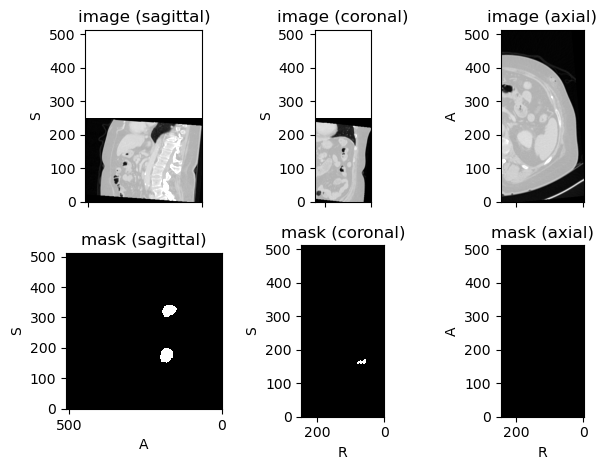

In [16]:
subject.plot()

In [9]:
import os

In [11]:
augmentations = tio.Compose([
    tio.RandomElasticDeformation(),
    tio.RandomAffine()
])

for i in range(116,588):
    new_image = augmentations(subject)
    image = new_image['image']
    mask = new_image['mask']
    try:
        os.mkdir(f"/home/student/andrew/Documents/Seg3D/datasets/only_588/data/000000{i}")
    except:
        pass

    image.save(f"/home/student/andrew/Documents/Seg3D/datasets/only_588/data/000000{i}/imaging.nii.gz")
    mask.save(f"/home/student/andrew/Documents/Seg3D/datasets/only_588/data/000000{i}/segmentation.nii.gz")

In [23]:
paths = glob.glob("/home/student/andrew/Documents/Seg3D/datasets/only_588/data/*")

train=[]
validation=[]

for path in paths:
    if '000000' in path.split('/')[-1]:
        train.append(path.split('/')[-1])
    else:
        validation.append(path.split('/')[-1])

print(train)
print(validation)

split = {
    '0':{
        "Train":train,
        "Validation":validation
    }
}

import json

ob = json.dumps(split)
with open('/home/student/andrew/Documents/Seg3D/datasets/only_588/splits.json', 'w+') as fl:
    fl.write(ob)

['000000344', '00000086', '00000041', '00000023', '000000164', '00000056', '0000005', '000000201', '000000473', '00000085', '000000154', '00000024', '000000197', '000000150', '00000015', '000000239', '000000327', '000000119', '000000380', '000000388', '000000342', '000000256', '0000003', '000000425', '000000462', '00000050', '000000579', '000000529', '000000574', '000000383', '000000147', '00000097', '000000124', '000000258', '000000203', '000000587', '000000264', '00000035', '000000123', '00000051', '000000385', '000000558', '000000158', '000000230', '00000022', '000000440', '00000019', '000000414', '00000053', '00000080', '000000525', '000000262', '00000055', '000000409', '000000476', '00000045', '000000429', '000000115', '000000263', '00000028', '000000370', '00000067', '00000027', '000000555', '000000207', '000000244', '000000135', '00000091', '000000363', '000000563', '000000502', '000000393', '000000322', '000000301', '00000088', '000000270', '000000190', '000000401', '000000419'